In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [45]:
# reading the data 
readFile = pd.read_excel("fsi-2020.xlsx")
readFile.to_csv("fsi-2020.csv", index=None,header=True)
data = pd.DataFrame(pd.read_csv("fsi-2020.csv"))
data.head()

,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
0,Yemen,2020-01-01,1st,112.438694,9.700000,10.0,9.69887,9.400000,7.800000,7.000000,9.889823,9.500000,9.950000,9.800000,9.7,10.000000,-1.061306
1,Somalia,2020-01-01,2nd,110.888959,9.811328,10.0,8.60000,9.100000,9.367151,8.900000,8.888107,9.100000,9.000000,9.981087,9.1,9.041286,-1.311041
2,South Sudan,2020-01-01,3rd,110.752190,9.400000,9.7,9.10000,9.500000,9.200000,6.800000,9.944415,9.500000,9.000000,9.450357,9.7,9.457419,-1.447810
3,Syria,2020-01-01,4th,110.749697,9.900000,9.9,10.00000,8.686367,7.200000,8.413343,9.950000,9.100000,10.000000,7.600000,10.0,9.999986,-0.850303
4,Congo Democratic Republic,2020-01-01,5th,109.394621,8.500000,9.8,9.70000,8.000000,8.619842,6.900000,9.660971,9.464911,9.548897,9.800000,10.0,9.400000,-0.805379


In [47]:
data.rename (columns = {'Total': 'total','C3: Group Grievance':'grievance', 'E1: Economy':'economy'}, inplace = True)

data. head()

,Country,Year,Rank,total,C1: Security Apparatus,C2: Factionalized Elites,grievance,economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
0,Yemen,2020-01-01,1st,112.438694,9.700000,10.0,9.69887,9.400000,7.800000,7.000000,9.889823,9.500000,9.950000,9.800000,9.7,10.000000,-1.061306
1,Somalia,2020-01-01,2nd,110.888959,9.811328,10.0,8.60000,9.100000,9.367151,8.900000,8.888107,9.100000,9.000000,9.981087,9.1,9.041286,-1.311041
2,South Sudan,2020-01-01,3rd,110.752190,9.400000,9.7,9.10000,9.500000,9.200000,6.800000,9.944415,9.500000,9.000000,9.450357,9.7,9.457419,-1.447810
3,Syria,2020-01-01,4th,110.749697,9.900000,9.9,10.00000,8.686367,7.200000,8.413343,9.950000,9.100000,10.000000,7.600000,10.0,9.999986,-0.850303
4,Congo Democratic Republic,2020-01-01,5th,109.394621,8.500000,9.8,9.70000,8.000000,8.619842,6.900000,9.660971,9.464911,9.548897,9.800000,10.0,9.400000,-0.805379


In [48]:
data.corr()

,total,C1: Security Apparatus,C2: Factionalized Elites,grievance,economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
total,1.000000,0.887130,0.874747,0.672733,0.858549,0.866416,0.779708,0.856040,0.904541,0.842300,0.882506,0.819482,0.827935,0.112451
C1: Security Apparatus,0.887130,1.000000,0.763882,0.638240,0.722351,0.726518,0.654861,0.741336,0.788740,0.759301,0.749146,0.720535,0.685118,0.175215
C2: Factionalized Elites,0.874747,0.763882,1.000000,0.701263,0.676032,0.674450,0.583273,0.867237,0.669605,0.797493,0.660440,0.695177,0.697836,0.030375
grievance,0.672733,0.638240,0.701263,1.000000,0.416864,0.438727,0.382782,0.605498,0.453755,0.608289,0.432959,0.656434,0.443671,0.092232
economy,0.858549,0.722351,0.676032,0.416864,1.000000,0.767501,0.759385,0.656312,0.836760,0.598253,0.781763,0.681460,0.804255,0.122451
E2: Economic Inequality,0.866416,0.726518,0.674450,0.438727,0.767501,1.000000,0.711998,0.685664,0.890326,0.671398,0.879751,0.616687,0.666823,0.172509
E3: Human Flight and Brain Drain,0.779708,0.654861,0.583273,0.382782,0.759385,0.711998,1.000000,0.529542,0.767005,0.513212,0.721149,0.555292,0.757911,0.016465
P1: State Legitimacy,0.856040,0.741336,0.867237,0.605498,0.656312,0.685664,0.529542,1.000000,0.671294,0.892416,0.653779,0.620620,0.634256,0.075583
P2: Public Services,0.904541,0.788740,0.669605,0.453755,0.836760,0.890326,0.767005,0.671294,1.000000,0.658843,0.932785,0.728401,0.719994,0.144908
P3: Human Rights,0.842300,0.759301,0.797493,0.608289,0.598253,0.671398,0.513212,0.892416,0.658843,1.000000,0.691350,0.620215,0.605788,0.065444


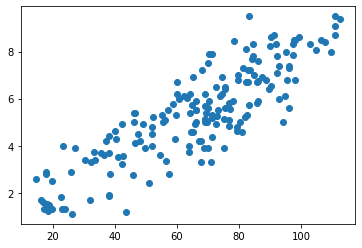

In [49]:
plt.scatter(data.total, data.economy)

In [50]:
results = smf.ols('total ~ economy', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     493.5
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           6.09e-53
Time:                        22:41:16   Log-Likelihood:                -700.39
No. Observations:                 178   AIC:                             1405.
Df Residuals:                     176   BIC:                             1411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.8796      2.648      4.108      0.000       5.654      16.106
economy       10.2765      0.463     22.214      0.000       9.364      11.189
==============================================================================
Omnibus:                        4.777   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                2.791
Skew:                           0.046   Prob(JB):                        0.248
Kurtosis:                       2.394   Cond. No.                         16.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 
### (g) Write out the complete and correct interpretation of the intercept, including what the relevant variable(s) stand for, not just the variable names.


The Intercept term in regression analysis is the value at which the regression line crosses the y-axis. The coef of intercept means that at this value of y, the line will cross the y-axis. Here coef is 10.87 means the reg. line will cross y axis in first quadrant as the value is positive. Its values doesn't effect any independent variable. 

### (h) Write out the complete and correct interpretation of the coefficient on economy, including what the relevant variable(s) stand for, not just the variable names.


The coef of economy is 10.27, it means that with unit increase in economy, there will be 10.27 times change in our dependent variable which is total, also represnts the slope of the line. 

### (i) Write out the complete and correct interpretation of the p-value for economy, including what the relevant variable(s) stand for, not just the variable names.

The p-value for each independent variable tests the null hypothesis that the variable has no correlation with the dependent variable. Here the p value of economy is 0.00 which is less than 0.05 (considering 5 % confidence interval).
If the p-value for a variable is less than your significance level, your sample data provide enough evidence to reject the null hypothesis. Hence we can conclude that our independent var economy has cannot be discarded from model building. 

### (j) Write out the complete and correct interpretation of the confidence interval for economy, in cluding what the relevant variable(s) stand for, not just the variable names.



For 95 % confidence interval we have 0.05 and for 2 tailed test - 0.25 on either side of the curve and hence we see [0.025	0.975] in the summary. 
Value of economy interval : [9.364	11.189]. It simply means the area covered under the curve between the two tails - lower tail and upper tail. - TBD 

### (k) Write out the complete and correct interpretation of R-squared, including what the relevant variable(s) stand for, not just the variable names.

Using one variable - economy, we get R squared value of 0.737, which is okay. R-squared is a statistical measure of how close the data are to the fitted regression line. R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.

So, 73 % is above average but it can be imporved by increasing the number of features in the model. 

# Question 2 

#### (a) We will now conduct a multiple regression using OLS. We are going to add the variable grievance as a second independent variable. State the null and alternative hypotheses for this new variable for a two-tailed test.

- Null Hypothesis : The current model is a best fit model and adding Varible grievance doesn't add any significance in the model as there is no statical significance or association in independent variable grievance and target varible - total. 
- Alternate Hypothesis : The current model is *NOT* a best fit model and adding Varible grievance will add  significance in the model as there should be some statical significance or association in independent variable grievance and target varible - total. 

#### (b) Conduct a multiple OLS regression with the model from Question 2(a) using the statistical approach and present a table of the results.

In [51]:
X = data[['economy','grievance']]
y = data[['total']]
X = sm.add_constant(X)


results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     524.7
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           1.18e-74
Time:                        22:41:28   Log-Likelihood:                -646.15
No. Observations:                 178   AIC:                             1298.
Df Residuals:                     175   BIC:                             1308.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2370      2.237     -1.000      0.319      -6.653       2.178
economy        8.3752      0.376     22.255      0.000       7.632       9.118
grievance      3.9981      0.330     12.120      0.000       3.347       4.649
==============================================================================
Omnibus:                        3.965   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                3.269
Skew:                          -0.227   Prob(JB):                        0.195
Kurtosis:                       2.515   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (c) Write out the complete and correct interpretation of the coefficient on grievance, including what the relevant variable(s) stand for, not just the variable names.


The coef of grievance is 3.9981, it means that with unit increase in grievance, there will be 3.9981 times change in our dependent variable total. 

#### (d) Is this model an improvement over the simple linear regression from Question 1? How did you come to this conclusion?

Yes, there is a significant improvement in our model, 12 % to be exact. We can conclude this by looking at the R squared values, in our last model R squared was 73 and after adding new variable it goes up to 85. And hence we can conclude that there is an improvement in model by adding this new varible.

#### (e) Can we reject or fail to reject the null hypothesis for new variable? How do you know? Be as thorough as possible in your reasoning.

We fail to reject the null hypothesis as the p value (0.00) is less than the significance level (0.05). And hence we can say that this variable (grievance) is statistically significant and probably a worthwhile addition to your regression model

# Question 3

### (a) We're going to conduct a multiple linear regression through machine learning, using the exact same multiple regression model from Question 2. First, set up your X and y arrays using the variable names in your setup syntax.

In [52]:
X = data[['economy','grievance']]
y = data[['total']]
X = sm.add_constant(X)

###  (b) Divide your X and y into training and test sets. Make the test set 25% of your data, and set the random_state to 4.


In [53]:
X_train, X_test, y_train, y_test= train_test_split(X, y,train_size=0.75, random_state=4)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(133, 3) (45, 3)
(133, 1) (45, 1)


### (c) Train the algorithm,

In [54]:
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     336.2
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           4.15e-52
Time:                        22:41:32   Log-Likelihood:                -485.65
No. Observations:                 133   AIC:                             977.3
Df Residuals:                     130   BIC:                             986.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9019      2.756     -0.690      0.491      -7.353       3.550
economy        8.2347      0.477     17.278      0.000       7.292       9.178
grievance      4.0243      0.388     10.368      0.000       3.256       4.792
==============================================================================
Omnibus:                        9.181   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                4.829
Skew:                          -0.258   Prob(JB):                       0.0894
Kurtosis:                       2.222   Cond. No.                         28.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (d) Print the intercept and coefficients and interpret them accordingly, including what the relevant variable(s) stand for, not just the variable names.

          coef	
const	    : -1.9019	

economy	    : 8.2347	

grievance	: 4.0243	


- The coef of constant which is intercept is -1.90, meaning that the regression line will cross y axis at -1.90 value of y.
- The coef of economy is 8.23, it means that with unit increase in economy, there will be 8.23 times change in our dependent variable total.

- The coef of grievance is 4.02, it means that with unit increase in grievance, there will be 4.02  times change in our dependent variable total. 

### (e) Generate a table of the first 10 values of your actual vs. predicted values. How does it look like you did based on this?

     Actual values  Predicted values  Difference
163      24.108703         25.705320   -1.596616
142      42.353130         56.960097  -14.606967
14       97.167611        103.375893   -6.208282
45       83.000000         86.388847   -3.388847
81       70.813580         55.857434   14.956146
157      32.332289         36.545111   -4.212822
26       91.693713         87.796516    3.897197
74       72.994114         70.639015    2.355099
1       110.888959        107.643217    3.245742
76       72.544798         63.092632    9.452166


Text(0, 0.5, 'y_test_pred')

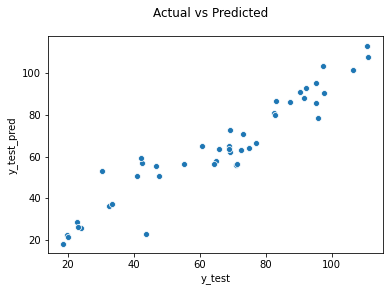

In [55]:
y_pred = results.predict(X_test)
diff = y_test.total - y_pred
d = {'Actual values': y_test.total.head(10), 'Predicted values': y_pred.head(10), 'Difference': diff.head(10)}
print(pd.DataFrame(data=d))

plt.figure()
sns.scatterplot(y_test.total, y_pred)
plt.suptitle("Actual vs Predicted")
plt.xlabel("y_test")
plt.ylabel("y_test_pred")

- As we can see from the above printed Dataframe - actual value, predicted value and their difference based on the test dataset, there is some small and some notable difference in the table and can be imporved.

- From the scatter plot between the actual and predicted values, we can see that there is almost linear line depicting the good relation between actual and predicted. A straight line cutting axis at (0,0) would be the ideal line represting zero errors. 

### (f) Generate the R-squared and interpret it.

In [56]:
print("R - squared :", results.rsquared)

R - squared : 0.8379997429109337


R-squared evaluates the scatter of the data points around the fitted regression line. It is also called the coefficient of determination, or the coefficient of multiple determination for multiple regression. For the same data set, higher R-squared values represent smaller differences between the observed data and the fitted values.

In our case it is around 0.83 which means that it explains around 83 % variance in data which is good. 

### (g) Remember that when we have more than one independent variable, we use the adjusted R squared instead. Write code that will generate the adjusted R-squared (may require some research!) and interpret it.


In [57]:
print("R - squared :", results.rsquared_adj)

R - squared : 0.8355074312634097


Adj R square measures the proportion of variation explained by only those independent variables that really help in explaining the dependent variable. It penalizes you for adding independent variable that do not help in predicting the dependent variable.

In our case adj square is 0.83 which is good value, important to note that adj r square increased from 0.73 to 0.83 even after adding one variable which means that 

### (h) Compare your overall ML output with your statistical approach to multiple OLS in Question 2. How do the results compare?


- In Question 2, 100 % of the available data is used for training and we got R squared of 85 %
- After splitting data into train and test we got R squared of 83 %  (decreased by 2 % )   

This decrease is due to the reduction of training dataset from 100 % to 75 % but its good to take some data out for testing as in earlier approch we don't have any held out data set to test our model and this may lead to the problem of overfitting of the model which means very good performance on train data but low on real world unseen data. 

### (i) Go back and re-run this ML regression analysis, but this time with the test set as 90% of your data (keep the random_state the same). How does this influence your results, and why?

Note: You don't need to re-type all your code, just run the analysis, but make sure to change your code back to your original answer for Question 3(b) before turning it in!

For Test set as 25 % of the data and Random_state=4 : 
R-squared:	0.838

Adj. R-squared:	0.836

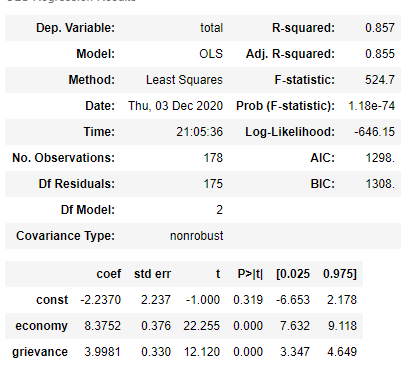

For Test set as 90 % of the data and Random_state=4 :
R-squared:	0.849

Adj. R-squared:	0.827

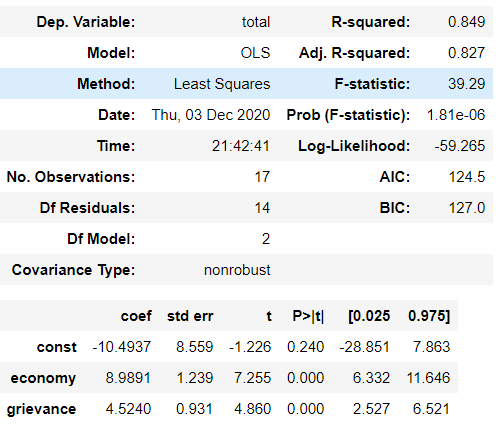

# Question 4 : 

### (a) We're going to conduct a k-NN classification. To do this, we need a categorical dependent variable. Create a new column called total cat that takes the value "fragile" if the total score is greater than the median for total, and the value "stable" if the total score is less than or equal to the median for total. Show the first five rows of your updated data frame.

In [58]:
median_total = data.total.median()
data['total_cat'] = data.total.apply(lambda x : 'fragile' if x > median_total else 'stable')
data.head()

,Country,Year,Rank,total,C1: Security Apparatus,C2: Factionalized Elites,grievance,economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year,total_cat
0,Yemen,2020-01-01,1st,112.438694,9.700000,10.0,9.69887,9.400000,7.800000,7.000000,9.889823,9.500000,9.950000,9.800000,9.7,10.000000,-1.061306,fragile
1,Somalia,2020-01-01,2nd,110.888959,9.811328,10.0,8.60000,9.100000,9.367151,8.900000,8.888107,9.100000,9.000000,9.981087,9.1,9.041286,-1.311041,fragile
2,South Sudan,2020-01-01,3rd,110.752190,9.400000,9.7,9.10000,9.500000,9.200000,6.800000,9.944415,9.500000,9.000000,9.450357,9.7,9.457419,-1.447810,fragile
3,Syria,2020-01-01,4th,110.749697,9.900000,9.9,10.00000,8.686367,7.200000,8.413343,9.950000,9.100000,10.000000,7.600000,10.0,9.999986,-0.850303,fragile
4,Congo Democratic Republic,2020-01-01,5th,109.394621,8.500000,9.8,9.70000,8.000000,8.619842,6.900000,9.660971,9.464911,9.548897,9.800000,10.0,9.400000,-0.805379,fragile


### (b) Create your X and y arrays using the iloc syntax in your setup.

In [59]:
X = data.iloc[:, 6:8].values
y = data.iloc[:, 17].values

### (c) Divide your X and y into training and test sets. Make the test set 25% of your data and set the random_state to 4.


In [60]:
X_train, X_test, y_train, y_test= train_test_split(X, y,train_size=0.75, random_state=4)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(133, 2) (45, 2)
(133,) (45,)


### (d) Train your algorithm.


In [61]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)


KNeighborsClassifier()

### (e) Generate a table of the first 10 actual vs. predicted values. How does it look like you did?

In [62]:
y_pred = model.predict(X_test)

### (f) Print the confusion matrix and classification report. Interpret the confusion matrix.

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18  3]
 [ 5 19]]
              precision    recall  f1-score   support

     fragile       0.78      0.86      0.82        21
      stable       0.86      0.79      0.83        24

    accuracy                           0.82        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.83      0.82      0.82        45



### (g) Create a plot of the mean error of the model for different values of k between 1 and 50

Text(0, 0.5, 'Mean Error')

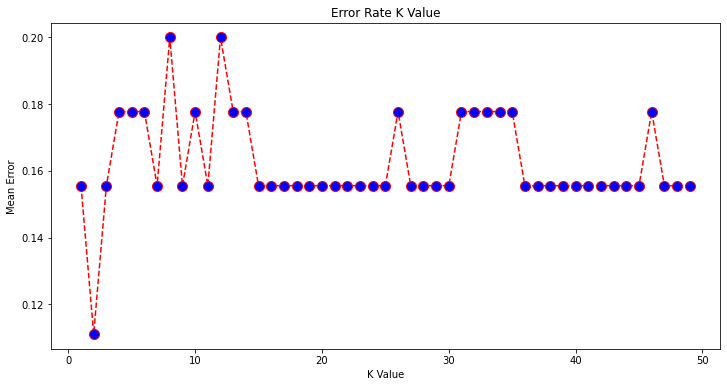

In [64]:
error = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### (h) How does the model perform as k increases?

From the Graph we can see that the mean error is near zero (0.111) when the value of the K is 2 . 
As we increase the value of k form 1 to 50, initially it decreases on 2 and then increase and after some time, it stablies on 0.15 roughly for values from 14 till 50. 
Which represent increasing k doesn't always mean drop in mean error as we can see in the above graph.

# Question 5

### (a) Looking back on our work across four models, how confident are you that we've explained state fragility with these two independent variables, and why?

In first 3 models, we have build a linear regression model and correctly predicted test data using our models with accurancy of around 80 %. In last model we have created a classification model and in that model we can use of confusion metrics to depict the errors in explaining fragility and the precision is 0.78. So, we can say that by 78 % confidence that we are able to explain state fragility with these two independent variables. 

### (b) Is there a risk of endogeneity in our research? If yes, please provide examples for each relevant independent variable.

In [65]:
print("Missing values in dataset :",  data.isna().sum().sum())

Missing values in dataset : 0


Endogeneity refers to a situation when an independent variable is correlated to the error term.
Sources of endogeneity : 
- omitted variables 
- simultaneity 
- selection bias

Yes, there is always some risk of endogeneity in our research. 

- As there are 0 missing values in our dataset omitted variables is not a problem for us. 
- simultaneity means -  where X causes Y and Y causes X , as we can see from plot in Question 6-c, there is not direct causation between variable. 
- There can be some selection bias in our model as we have kept low random state and haven't done cross validation or shuffling. 


### (c) Is there a risk of confounders? If yes, please provide examples for each relevant independent variable.

Confounder is a variable that influences both the dependent variable and independent variable, causing a spurious association.

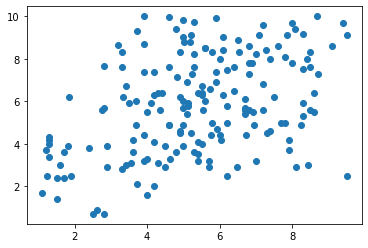

In [66]:
plt.scatter(data.economy, data.grievance)
plt.show()

Althought, there is no direct connection between correlation between vars and confounders, but still we can get a rought idea.

As, we can see the scatter plot between our 2 independent vars - economy and grievance that thet are scattered across the plane and don't form any kind of linear or non linear correlation amoung each other.

### (d) How confident are you in terms of how the variables we've worked with are measured? Please describe your answer in terms of conceptualization and operationalization.

In [67]:
print(data.shape)

(178, 18)


We have used 2 variables - Economy and Grievance
- Conceptualization - Process of definening or specifying the concept - First step of measurement process. I think the problem statement and the data collected for the purpose are in alignment and rank wise analysis gives us a good understanding of the position of the country. 

- Operationalization - Second step in measurement process - As there are records of around 178 countries and 18 factors are considered for data collection, I feel there is ample of data available for analysis while more features can be considered to conclude state of the county for a particular year. 

### (e) What is a next step you might recommend to improve research on this topic?

- Analysis Wise : We can include more feature given in the dataset to increase the accuracy and try model selection method to choose the best Machine learning algorithm to find the optimal solution.

- Research wise : https://fragilestatesindex.org/  : Ample of data and information is present on FSI website as well as historical data is also present to do a comparative study and do a predictive analysis on the performance of countries in coming future.  